In [21]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_color_codes()

%matplotlib inline
%config InlineBackend.figure_format='png'


In [22]:
from __future__ import division

In [25]:
a = -1/2*np.log2(1/2)-1/2*np.log2(1/2)

In [26]:
a

1.0

In [28]:
-1/4*np.log2(1/4)-3/4*np.log2(3/4)

0.81127812445913283

In [54]:
import pydot
import StringIO
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(classifier):
    # 버퍼 만들어줌.
    dot_buf = StringIO.StringIO()
    # 모델에서 dot 랭귀지로 바꿔줌
    export_graphviz(classifier, out_file = dot_buf, feature_names = iris.feature_names)
    # 스트링 버퍼에 dot랭귀지를 넣어줌 (매번 그림저장ㄴㄴ, 메모리에 ㄲ)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())
    # 이미지 png 렌더링
    image = graph.create_png()
    # 버퍼에 이미지 저장
    image_buf = StringIO.StringIO()
    image_buf.write(image)
    return Image(image_buf.getvalue())


def plot_decision_regions(X, y, classifier, title):
    resolution = 0.01
    markers = ('s','^', 'o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c = cmap(idx), marker = markers[idx], s = 80, label = cl)
    
    plt.xlabel('petal length [cm]')
    plt.ylabel('petal width [cm]')
    plt.legend(loc = 'upper left')
    plt.title(title)
    plt.show()

In [50]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

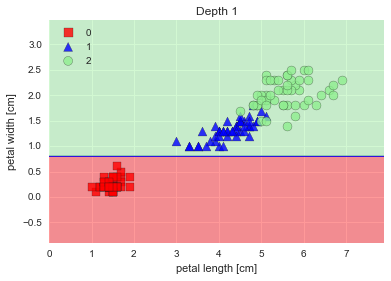

In [52]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(X, y)
plot_decision_regions(X, y, tree1, "Depth 1")

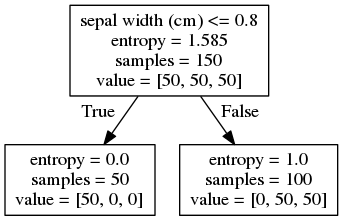

In [60]:
draw_decision_tree(tree1)

In [63]:
# 타이타닉 생존자
df = pd.read_csv('http://dato.com/files/titanic.csv', index_col = 0)

In [65]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [66]:
feature_names = ["Pclass", "Age", "Sex"]
dfX = df[feature_names]
dfy = df["Survived"]
dfX.tail()

,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,male
888,1,19.0,female
889,3,NaN,female
890,1,26.0,male
891,3,32.0,male


In [67]:
# imputation NaN을 바꿔줘야함.
from sklearn.preprocessing import LabelEncoder
dfX.ix[:,"Sex"] = LabelEncoder().fit_transform(dfX["Sex"])
dfX.tail()

/home/rrbb/.pyenv/versions/2.7.11/envs/python2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,1
888,1,19.0,0
889,3,NaN,0
890,1,26.0,1
891,3,32.0,1


In [68]:
dfX.ix[:,"Age"].fillna(int(dfX["Age"].mean()), inplace=True)
dfX.tail()

/home/rrbb/.pyenv/versions/2.7.11/envs/python2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Pclass,Age,Sex
PassengerId,,,
887,2,27.0,1
888,1,19.0,0
889,3,29.0,0
890,1,26.0,1
891,3,32.0,1


In [69]:
from sklearn.preprocessing import OneHotEncoder
dfX2 = pd.DataFrame(OneHotEncoder().fit_transform(dfX["Pclass"].as_matrix()[:,np.newaxis]).toarray(),
                   columns = ['first_class', 'second_class', 'third_class'], index = dfX.index)
dfX = pd.concat([dfX, dfX2], axis = 1)
del(dfX["Pclass"])
dfX.tail()

,Age,Sex,first_class,second_class,third_class
PassengerId,,,,,
887,27.0,1,0.0,1.0,0.0
888,19.0,0,1.0,0.0,0.0
889,29.0,0,0.0,0.0,1.0
890,26.0,1,1.0,0.0,0.0
891,32.0,1,0.0,0.0,1.0


In [74]:
a = [[1],[2],[3]]
print(OneHotEncoder().fit_transform(a)).toarray()

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [75]:
# train, test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 1)

In [81]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)


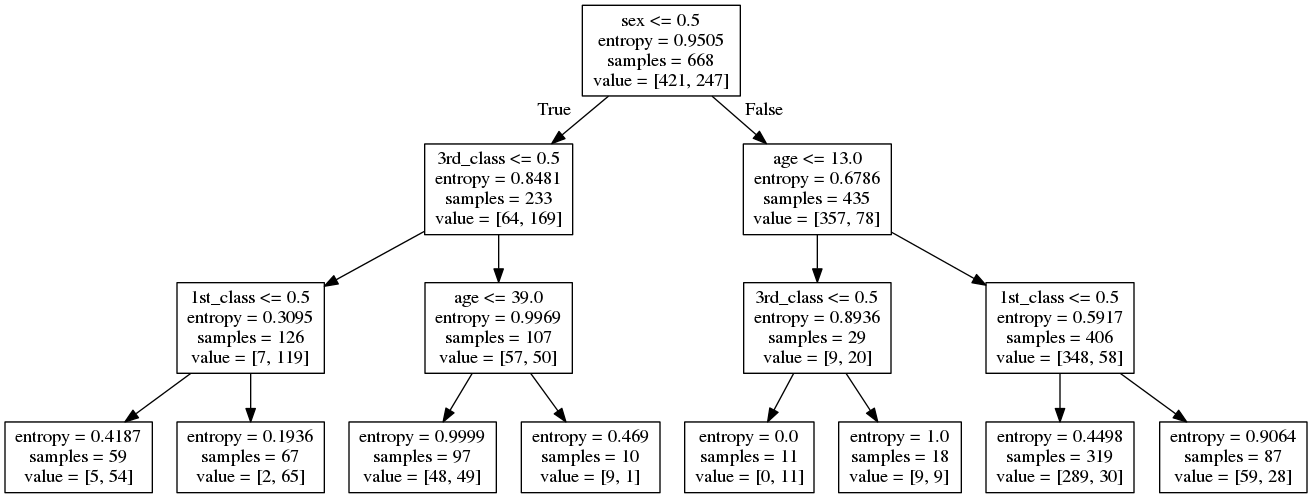

In [82]:
command_buf = StringIO.StringIO()
export_graphviz(model, out_file = command_buf, feature_names = ['age', 'sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())
image = graph.create_png()
image_buf = StringIO.StringIO()
image_buf.write(image)
Image(image_buf.getvalue())

In [83]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

news = fetch_20newsgroups(subset = 'train', categories = categories, shuffle=True, random_state=1)
news_test = fetch_20newsgroups(subset='test', categories = categories, shuffle=True, random_state=2)


In [84]:
len(news.data)

1554

In [143]:
news.target_names

['comp.graphics', 'sci.space', 'talk.religion.misc']

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_news1 = Pipeline([
        ('vect', TfidfVectorizer(stop_words="english")),
        ('clf', DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_leaf=5, )),
    ])

clf_news1.fit(news.data, news.target);


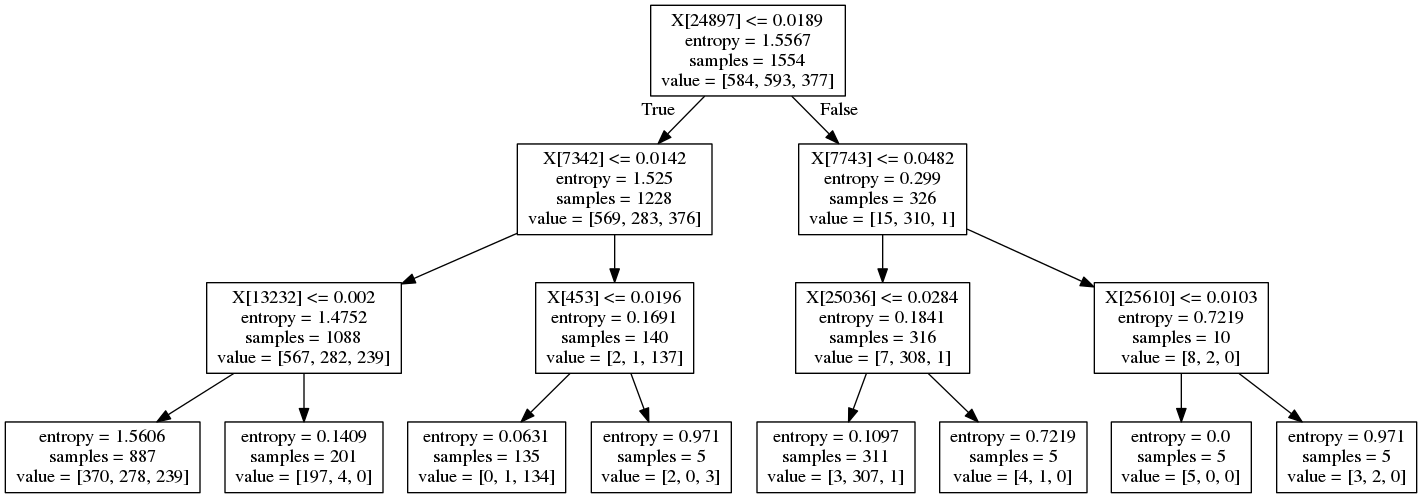

In [140]:
command_buf = StringIO.StringIO()
export_graphviz(model, out_file = command_buf)
graph = pydot.graph_from_dot_data(command_buf.getvalue())
image = graph.create_png()
image_buf = StringIO.StringIO()
image_buf.write(image)
Image(image_buf.getvalue())

In [142]:
print(confusion_matrix(news_test.target, clf_news1.predict(news_test.data)))
print(classification_report(news.target, clf_news1.predict(news.data), digits=4))
print(classification_report(news_test.target, clf_news1.predict(news_test.data), digits=4))

[[375  14   0]
 [194 200   0]
 [184   3  64]]
             precision    recall  f1-score   support

          0     0.5249    0.9914    0.6864       584
          1     0.9871    0.5177    0.6792       593
          2     0.9786    0.3634    0.5300       377

avg / total     0.8114    0.6583    0.6457      1554

             precision    recall  f1-score   support

          0     0.4980    0.9640    0.6567       389
          1     0.9217    0.5076    0.6547       394
          2     1.0000    0.2550    0.4063       251

avg / total     0.7813    0.6180    0.5952      1034



In [ ]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(news.data)
y = news.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy').fit(X,y)

In [ ]:
X_test = vect.transform(news_data.data)
y_test = news_test.target
